# GradBoost Model

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4
sklearn version: 1.1.3
Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


### Import data

In [2]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [3]:
players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])

# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])

In [4]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


### X,y division

In [5]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]

X_small_file = small_file.iloc[:, 0:44]

In [6]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]

y_small_file = small_file.iloc[:, 44]


In [7]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [8]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Normalisation?

In [9]:
# Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_players_all_normalized = scaler.fit_transform(X_players_all)
X_players_ranked_normalized =  scaler.fit_transform(X_players_ranked)
X_players_pro_normalized = scaler.fit_transform(X_players_pro)
X_small_file_normalized = scaler.fit_transform(X_small_file)

X_players_all_normalized = pd.DataFrame(X_players_all_normalized, columns=X_players_all.columns)
X_players_ranked_normalized = pd.DataFrame(X_players_ranked_normalized, columns=X_players_ranked.columns)
X_players_pro_normalized = pd.DataFrame(X_players_pro_normalized, columns=X_players_pro.columns)
X_small_file_normalized = pd.DataFrame(X_small_file_normalized, columns=X_small_file.columns)

In [10]:
# Z-score for teams
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_teams_all_normalized = scaler.fit_transform(X_teams_all)
X_teams_ranked_normalized =  scaler.fit_transform(X_teams_ranked)
X_teams_pro_normalized = scaler.fit_transform(X_teams_pro)

X_teams_all_normalized = pd.DataFrame(X_teams_all_normalized, columns=X_teams_all.columns)
X_teams_ranked_normalized = pd.DataFrame(X_teams_ranked_normalized, columns=X_teams_ranked.columns)
X_teams_pro_normalized = pd.DataFrame(X_teams_pro_normalized, columns=X_teams_pro.columns)

In [11]:
X_players_ranked_normalized.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_offensive_third,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball
0,-0.244786,-0.006564,-0.105950,-0.028138,0.536498,0.210515,0.345503,0.088237,0.262826,0.215025,...,-2.540903,-1.018220,2.796536,-2.796536,0.839287,-0.839287,-0.364511,-0.855038,1.348097,-1.015858
1,-0.864632,-0.373041,-0.027812,-0.758952,0.873504,0.984698,-0.750224,-0.864637,-0.613178,-1.117797,...,-1.971989,-1.597289,2.192010,-2.192010,-0.759975,0.759975,-0.497711,0.621517,-0.427544,-0.227942
2,-1.452418,-0.477431,-0.355434,-0.857818,1.267432,0.003658,0.408733,0.966403,0.003394,-0.907351,...,-2.304965,-1.158523,2.380453,-2.380453,-0.729034,0.729034,0.502915,-0.122149,-1.340359,0.848635
3,-0.383717,-0.070282,-0.027254,-0.445694,0.808337,0.517473,-0.419809,1.273691,-0.545793,-0.451386,...,2.113161,-0.214666,-1.652232,1.652232,1.137094,-1.137094,-0.972034,1.952572,1.687142,-0.872435
4,0.289565,0.172737,0.445481,0.232608,0.082456,0.781302,-0.247855,-0.764557,-1.310612,-1.047648,...,0.370265,1.190915,-0.526095,0.526095,1.579936,-1.579936,-0.741370,-0.544279,-0.718776,0.116999


### Train-test split

In [12]:
from sklearn.model_selection import train_test_split
import sklearn
print(f"sklearn version: {sklearn.__version__}")

sklearn version: 1.1.3


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_teams_ranked_normalized, y_teams_ranked, random_state=20, test_size=0.4)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=20, test_size=0.5)

## Model

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
gbr = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10
)

In [17]:
# next is 1 min / met parameters meer dan 17 min / now is 6 min / 15 min

In [18]:
gbr.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_split=10, n_estimators=500)

### metrics

In [19]:
# next is 2 min / met parameter meer dan 63 min n_jobs=1 / n_jobs=-1 zou 6 x zo snel moeten gaan dan / now is 5 min

In [20]:
cross_val_score(gbr, X_train, y_train, cv=3, n_jobs=-1).mean()

0.7261063860458412

In [21]:
y_pred = gbr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred = gbr.predict(X_test)
y_pred_classes = y_pred
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7201960501657777


In [24]:
gbr.score(X_test, y_test)

0.7201960501657777

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.72      0.71      0.72      3430
        True       0.72      0.73      0.72      3507

    accuracy                           0.72      6937
   macro avg       0.72      0.72      0.72      6937
weighted avg       0.72      0.72      0.72      6937



In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [28]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7201960501657777
recall 0.7271171941830624
precision 0.7215619694397284
f1 0.7243289305496379


### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
print(confusion_matrix(y_test, y_pred))

[[2446  984]
 [ 957 2550]]


[[2446  984]
 [ 957 2550]]
0.7201960501657777


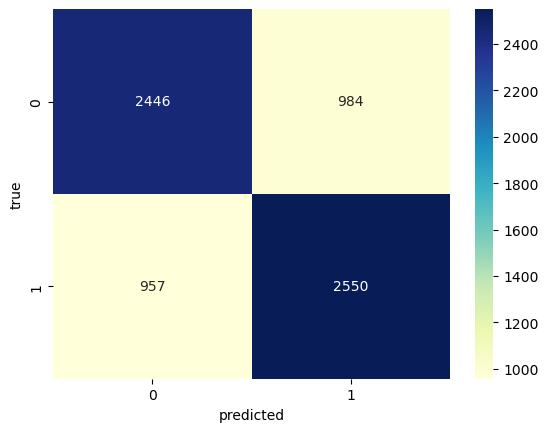

In [31]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[0.89982306 0.50242698 0.51644443 0.33644438 0.72183658 0.21494931
 0.98956252 0.66625451 0.86358021 0.58455317 0.2842434  0.97788757
 0.24095154 0.54497236 0.14155137 0.77645548 0.15421428 0.30743369
 0.41014393 0.14770511 0.9282066  0.60447051 0.14286749 0.80631887
 0.78450641 0.73107686 0.50583089 0.62717486 0.4648701  0.433609
 0.49544349 0.06276394 0.02542816 0.61852489 0.87890241 0.86983675
 0.60546675 0.04730159 0.95090153 0.19496726 0.34631438 0.66247976
 0.7080435  0.18676738 0.49099217 0.91339748 0.39849677 0.74888139
 0.62405079 0.63269573 0.5368417  0.96166205 0.74122193 0.93196918
 0.37788109 0.93880042 0.6317554  0.88892002 0.38143179 0.06277136
 0.40276387 0.78602324 0.10367625 0.34578223 0.25681199 0.61606869
 0.37286091 0.50256515 0.86512822 0.4803773  0.65348751 0.87202423
 0.30965198 0.47651199 0.23731166 0.27587408 0.28320938 0.16922582
 0.96105972 0.33618916 0.56925513 0.10118675 0.31403668 0.38446147
 0.87314789 0.44108588 0.93556088 0.88317709 0.59037082 0.178074

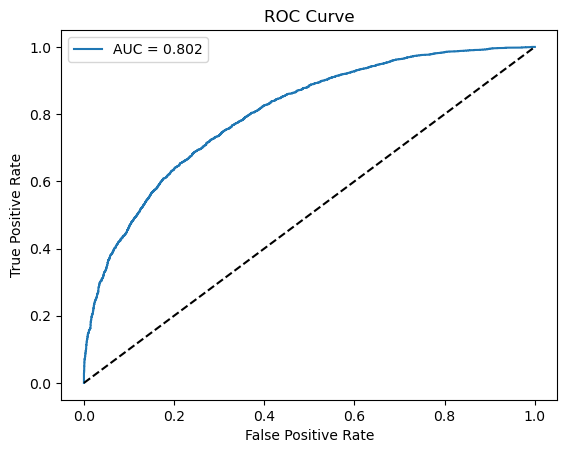

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [33]:
features = pd.DataFrame(gbr.feature_importances_, index = X_train.columns)

In [34]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_infront_ball,0.295272
avg_positioning_percent_behind_ball,0.190311
avg_positioning_time_front_of_ball,0.038366
min_positioning_percent_infront_ball,0.021984
avg_movement_percent_high_air,0.014084
...,...
max_positioning_percent_infront_ball,0.000524
positioning_percent_defensive_half_3,0.000465
movement_avg_speed_percentage_2,0.000436
movement_avg_speed_2,0.000336


# Model 2 -------------------------------------------------

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbr2 = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10,
    learning_rate= 0.1,
    max_depth=7
)

In [37]:
# next is 1 min / now depth=7 is 16 min / depth=9 21 min / 14 min

In [38]:
gbr2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, min_samples_split=10, n_estimators=500)

### metrics

In [39]:
# next is 2 min / 11 min

In [40]:
cross_val_score(gbr2, X_train, y_train, cv=3, n_jobs=-1).mean()

0.734563452020566

In [41]:
y_pred2 = gbr2.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
y_pred2 = gbr2.predict(X_test)
y_pred_classes = y_pred2
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7373504396713276


In [44]:
gbr2.score(X_test, y_test)

0.7373504396713276

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.74      0.73      0.73      3430
        True       0.74      0.74      0.74      3507

    accuracy                           0.74      6937
   macro avg       0.74      0.74      0.74      6937
weighted avg       0.74      0.74      0.74      6937



In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [48]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7373504396713276
recall 0.742800114057599
precision 0.7390070921985815
f1 0.7408987485779295


### Confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
print(confusion_matrix(y_test, y_pred2))

[[2510  920]
 [ 902 2605]]


[[2510  920]
 [ 902 2605]]
0.7373504396713276


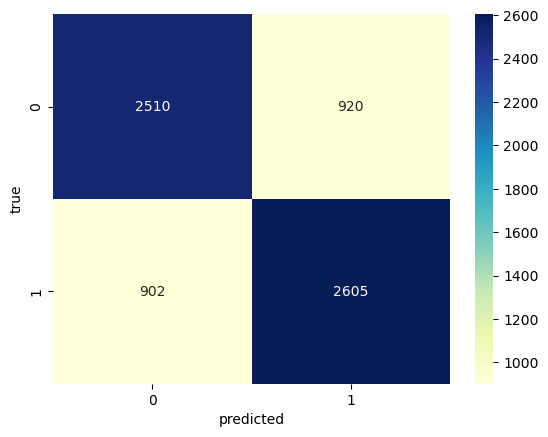

In [51]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[0.99323261 0.5278159  0.593063   0.30723197 0.97177388 0.07481047
 0.99886722 0.84058657 0.9858873  0.10684222 0.38420683 0.99786994
 0.73735907 0.56234834 0.01791177 0.90885822 0.04172079 0.10404083
 0.40990668 0.01220551 0.9811855  0.48813715 0.05134884 0.90414215
 0.72146953 0.94038138 0.84618227 0.79607913 0.25834397 0.27835328
 0.21771671 0.00380761 0.00342536 0.65293111 0.98474156 0.97600719
 0.42209967 0.01005599 0.99559991 0.18795774 0.16422189 0.88409938
 0.76549564 0.69838765 0.3919175  0.94856322 0.45282251 0.91909079
 0.91732085 0.66882559 0.27572286 0.98738839 0.88909483 0.98505995
 0.82780245 0.99263251 0.63937881 0.96201964 0.3770835  0.01943812
 0.26831711 0.71295437 0.06962396 0.44148072 0.08979722 0.77906165
 0.34295907 0.59576227 0.95752762 0.12936693 0.72617057 0.98264815
 0.14283268 0.19917097 0.47174972 0.65273677 0.21134133 0.07012435
 0.99479999 0.22971775 0.75763752 0.04758594 0.1522653  0.14816705
 0.97413731 0.7497903  0.98834823 0.98969253 0.32910231 0.0301

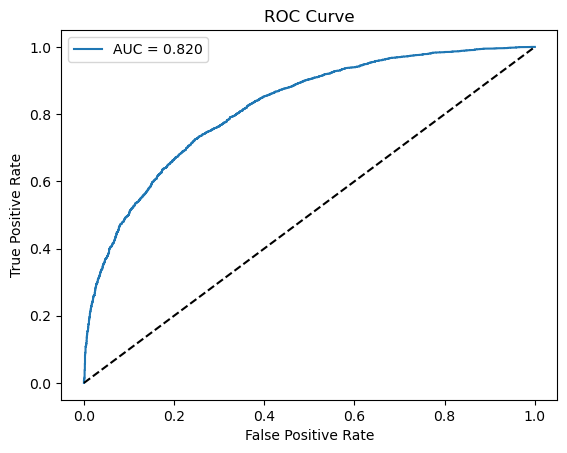

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr2.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [53]:
features = pd.DataFrame(gbr2.feature_importances_, index = X_train.columns)

In [54]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_infront_ball,0.175384
avg_positioning_percent_behind_ball,0.094084
avg_positioning_time_front_of_ball,0.021933
min_positioning_avg_distance_to_ball_no_possession,0.009414
avg_positioning_avg_distance_to_ball_no_possession,0.008986
...,...
movement_avg_speed_percentage_3,0.001329
var_positioning_percent_infront_ball,0.001293
movement_avg_speed_3,0.001287
movement_avg_speed_2,0.001180
